Evaluating Logistic Regression with Cross-Validation

Exercise: Implement logistic regression and evaluate the model using k-fold cross-validation.

Compare the cross-validation scores with a single train-test split evaluation.


In [246]:
import pandas as pd
df= pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [247]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [248]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [249]:
df=df.drop(columns='Cabin')
df= df.drop(columns='Ticket')
df=df.drop(columns='Name')
df=df.drop(columns='Fare')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
888,889,0,3,female,NaN,1,2,S
889,890,1,1,male,26.0,0,0,C


In [250]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(sparse_output=False)
gender= df['Sex'].values.reshape(-1,1)
df['Sex']= encoder.fit_transform(gender)

embarked= df['Embarked'].values.reshape(-1,1)
df['Embarked']= encoder.fit_transform(embarked)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0.0,22.0,1,0,0.0
1,2,1,1,1.0,38.0,1,0,1.0
2,3,1,3,1.0,26.0,0,0,0.0
3,4,1,1,1.0,35.0,1,0,0.0
4,5,0,3,0.0,35.0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,887,0,2,0.0,27.0,0,0,0.0
887,888,1,1,1.0,19.0,0,0,0.0
888,889,0,3,1.0,NaN,1,2,0.0
889,890,1,1,0.0,26.0,0,0,1.0


In [251]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='mean')
age= df['Age'].values.reshape(-1,1)
df['Age']=imputer.fit_transform(age)

In [252]:
X= df.drop(columns='Survived')
y= df['Survived']

In [253]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
standardized_features=scaler.fit_transform(X)

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(standardized_features,y, test_size=0.2, random_state=42)

In [255]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [256]:
y_pred= model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [257]:
# Accuracy with Train-Test Split
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
accuracy

0.8156424581005587

In [258]:
from sklearn.model_selection import  cross_val_score

cv_scores = cross_val_score(model, standardized_features, y, cv=5)  
print("Cross validation score: ", cv_scores.mean())

Cross validation score:  0.7833845960705543


Analyzing Overfitting and Underfitting in Decision Trees

Exercise: Train a decision tree classifier with varying depths to analyze overfitting and underfitting. 

Plot training and validation accuracies to visualize the effects


In [259]:
training_accuracies = []
validation_accuracies = []
depths = range(1, 21)  # Testing depths from 1 to 20

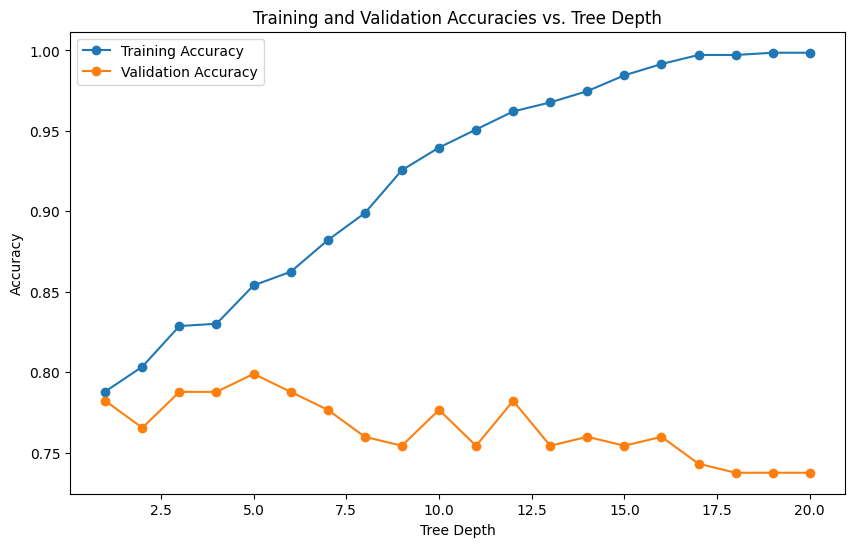

In [260]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    yTrain_pred = tree.predict(X_train)
    yTest_pred = tree.predict(X_test)
    
    train_acc = accuracy_score(y_train, yTrain_pred)
    test_acc = accuracy_score(y_test, yTest_pred)
    
    training_accuracies.append(train_acc)
    validation_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(depths, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, validation_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies vs. Tree Depth')
plt.legend()
plt.show()

In [261]:
# The plot shows that the model does well on the training data but performs poorly on the validation data.
# This means the model is overfitting.

Calculating Precision, Recall, and F1-Score for Logistic Regression

Exercise: Implement logistic regression and calculate precision, recall, and F1-score for the model. 

Tip: Discuss how these metrics provide insights into model performance in  your week article.


In [262]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision= precision_score(y_test, y_pred)
recall_score= recall_score(y_test, y_pred)
f1_score= f1_score(y_test, y_pred)

print("Precision Score: ", precision)
print("Recall Score: ", recall_score)
print("F1 Score: ", f1_score)

Precision Score:  0.7971014492753623
Recall Score:  0.7432432432432432
F1 Score:  0.7692307692307693


ROC Curve Analysis for Decision Trees

Exercise: Implement a decision tree classifier and plot the ROC curve.

Compute the AUC (Area Under the Curve) and interpret the results.


In [263]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(max_depth=depth, random_state=42)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=20, random_state=42)

In [264]:
y_pred_prob=tree.predict_proba(X_test)[:, 1]
y_pred_prob

array([0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0.])

In [265]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("AUC: ", roc_auc)

AUC:  0.7243243243243244


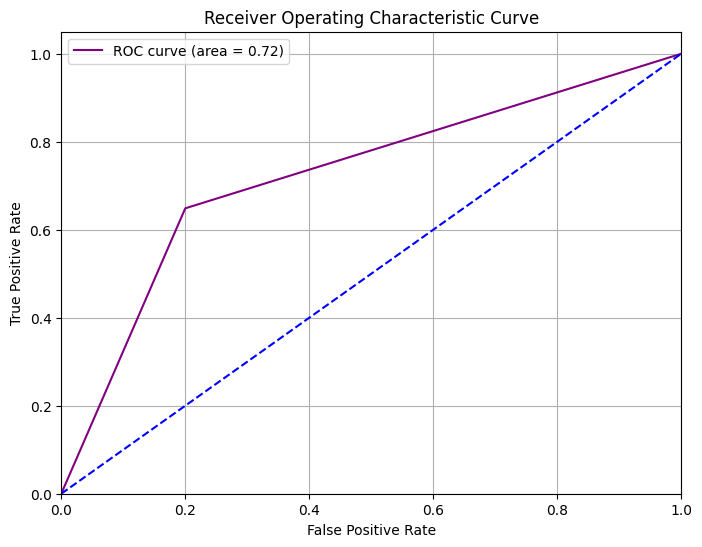

In [266]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=1.5, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Comparing Model Performance with and without Cross-Validation

Exercise: Train logistic regression and decision tree models with and without cross-validation. 

Compare their performance metrics, including accuracy, precision, and recall.


In [267]:
# training Logistic Regression Model without cross validation
from sklearn.linear_model import LogisticRegression
regression_model= LogisticRegression(max_iter=2000)
regression_model.fit(X_train, y_train)
reg_pred=regression_model.predict(X_test)

In [268]:
# training Decision Tree Model without cross validation
from sklearn.tree import DecisionTreeClassifier
decision_tree= DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
tree_pred=decision_tree.predict(X_test)

In [269]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy= accuracy_score(y_test, reg_pred)
precision= precision_score(y_test, reg_pred)
recall= recall_score(y_test, reg_pred)
print("Logistic Regression without Cross-Validation")
print("Accuracy: ", accuracy)
print("Precision Score: ", precision)
print("Recall Score", recall)

Logistic Regression without Cross-Validation
Accuracy:  0.8156424581005587
Precision Score:  0.7971014492753623
Recall Score 0.7432432432432432


In [270]:
accuracy= accuracy_score(y_test, tree_pred)
precision= precision_score(y_test, tree_pred)
recall= recall_score(y_test, tree_pred)
print("Decision Tree Classifier without Cross-Validation")
print("Accuracy: ", accuracy)
print("Precision Score: ", precision)
print("Recall Score", recall)

Decision Tree Classifier without Cross-Validation
Accuracy:  0.7430167597765364
Precision Score:  0.7
Recall Score 0.6621621621621622


In [271]:
# training Logistic Regression Model with cross validation
from sklearn.model_selection import  cross_val_score

cv_scores = cross_val_score(regression_model, standardized_features, y, cv=5)  
print("Cross validation score: ", cv_scores)

Cross validation score:  [0.7877095  0.78089888 0.78651685 0.75842697 0.80337079]


In [272]:
accuracy_cv = cross_val_score(regression_model, standardized_features, y, scoring='accuracy')
precision_cv = cross_val_score(regression_model, standardized_features, y, scoring='precision')
recall_cv = cross_val_score(regression_model, standardized_features, y, scoring='recall')

print("Logistic Regression without Cross-Validation")
print("Accuracy: ", accuracy_cv.mean())
print("Precision Score: ", precision_cv.mean())
print("Recall Score", recall_cv.mean())

Logistic Regression without Cross-Validation
Accuracy:  0.7833845960705543
Precision Score:  0.7275295349876008
Recall Score 0.6957374254049447


In [273]:
# training Decision Tree Model with cross validation
cv_scores = cross_val_score(decision_tree, standardized_features, y, cv=5)  
print("Cross validation score: ", cv_scores)

Cross validation score:  [0.62011173 0.7752809  0.7752809  0.80898876 0.8258427 ]


In [274]:
accuracy_cv_tree = cross_val_score(decision_tree, standardized_features, y, scoring='accuracy')
precision_cv_tree = cross_val_score(decision_tree, standardized_features, y, scoring='precision')
recall_cv_tree = cross_val_score(decision_tree, standardized_features, y, scoring='recall')

print("Decision Tree Classifier without Cross-Validation")
print("Accuracy: ", accuracy_cv_tree.mean())
print("Precision Score: ", precision_cv_tree.mean())
print("Recall Score", recall_cv_tree.mean())

Decision Tree Classifier without Cross-Validation
Accuracy:  0.7588600841127362
Precision Score:  0.6764924366636695
Recall Score 0.6583972719522592
